In [ ]:
import torch

In [ ]:
import torch.nn as nn

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torchvision
import torchvision.transforms as transforms


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [128]:
#hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.0001

In [51]:
#setup MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./data",transform=transforms.ToTensor(), download=True)

In [52]:
test_dataset = torchvision.datasets.MNIST(root="./data",train=False, transform=transforms.ToTensor(), download=True)

In [53]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=True)

In [94]:
class DenseNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DenseNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [120]:
model = DenseNet(input_size, hidden_size, num_classes).to(device)

In [129]:
#Loss and optimizer
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [250]:
#train the model to convergence
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #send to device
        images = images.reshape(-1, 28**2).to(device)
        one_hot_labels = torch.zeros(labels.size(0), num_classes)
        one_hot_labels[range(labels.size(0)), labels] = 1
        one_hot_labels.to(device)
        
        #run model and calculate loss
        outputs = model.forward(images)
        outputs.to(device)
        loss = loss_function(outputs, one_hot_labels)
        
        
        #calculate gradients and step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not (i+1) % 100:
            print('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    print("EPOCH {} COMPLETE".format(epoch+1))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch [1/5], Step[100/600], Loss: 0.0301
Epoch [1/5], Step[200/600], Loss: 0.0261
Epoch [1/5], Step[300/600], Loss: 0.0575
Epoch [1/5], Step[400/600], Loss: 0.0417
Epoch [1/5], Step[500/600], Loss: 0.0162
Epoch [1/5], Step[600/600], Loss: 0.0307
EPOCH 1 COMPLETE
Epoch [2/5], Step[100/600], Loss: 0.0241
Epoch [2/5], Step[200/600], Loss: 0.0229
Epoch [2/5], Step[300/600], Loss: 0.0386
Epoch [2/5], Step[400/600], Loss: 0.0484
Epoch [2/5], Step[500/600], Loss: 0.0188
Epoch [2/5], Step[600/600], Loss: 0.0177
EPOCH 2 COMPLETE
Epoch [3/5], Step[100/600], Loss: 0.0312
Epoch [3/5], Step[200/600], Loss: 0.0465
Epoch [3/5], Step[300/600], Loss: 0.0362
Epoch [3/5], Step[400/600], Loss: 0.0372
Epoch [3/5], Step[500/600], Loss: 0.0243
Epoch [3/5], Step[600/600], Loss: 0.0243
EPOCH 3 COMPLETE
Epoch [4/5], Step[100/600], Loss: 0.0312
Epoch [4/5], Step[200/600], Loss: 0.0376
Epoch [4/5], Step[300/600], Loss: 0.0329
Epoch [4/5], Step[400/600], Loss: 0.0374
Epoch [4/5], Step[500/600], Loss: 0.0427
Epoch 

In [251]:
#test model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        #send to device
        images = images.reshape(-1, 28**2).to(device)
        labels = labels.to(device)
        
        #run model
        outputs = model.forward(images)
        _, predictions = torch.max(outputs, 1)
        total+=labels.size(0)
        correct += (predictions == labels).sum().item()

    print("Accuracy: {} %".format(100* correct/total))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Accuracy: 95.47 %


In [252]:
def test_model(model_to_test):
    #test model
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            #send to device
            images = images.reshape(-1, 28**2).to(device)
            labels = labels.to(device)

            #run model
            outputs = model_to_test.forward(images)
            _, predictions = torch.max(outputs, 1)
            total+=labels.size(0)
            correct += (predictions == labels).sum().item()

        print("Accuracy: {} %".format(100* correct/total))

In [253]:
#turn off training in original original_model
for parameter in original_model.parameters():
    parameter.requires_grad = False
optimizer.zero_grad()
original_model.eval()

DenseNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [137]:
#base case: relabel the entire training dataset to the predictions of the original model

In [142]:
# hyperparameters - model 1
input_size = 784
hidden_size = 800
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.0001
model = DenseNet(input_size, hidden_size, num_classes)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [147]:
#train the model to convergence
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #send to device
        images = images.reshape(-1, 28**2).to(device)
        labels = original_model.forward(images).to(device)
        #run model and calculate loss
        outputs = model.forward(images)
        loss = loss_function(outputs, labels)
        
        
        #calculate gradients and step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not (i+1) % 100:
            print('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    print("EPOCH {} COMPLETE".format(epoch+1))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch [1/5], Step[100/600], Loss: 0.0429
Epoch [1/5], Step[200/600], Loss: 0.0165
Epoch [1/5], Step[300/600], Loss: 0.0307
Epoch [1/5], Step[400/600], Loss: 0.0163
Epoch [1/5], Step[500/600], Loss: 0.0227
Epoch [1/5], Step[600/600], Loss: 0.0180
EPOCH 1 COMPLETE
Epoch [2/5], Step[100/600], Loss: 0.0299
Epoch [2/5], Step[200/600], Loss: 0.0228
Epoch [2/5], Step[300/600], Loss: 0.0343
Epoch [2/5], Step[400/600], Loss: 0.0196
Epoch [2/5], Step[500/600], Loss: 0.0126
Epoch [2/5], Step[600/600], Loss: 0.0203
EPOCH 2 COMPLETE
Epoch [3/5], Step[100/600], Loss: 0.0203
Epoch [3/5], Step[200/600], Loss: 0.0175
Epoch [3/5], Step[300/600], Loss: 0.0118
Epoch [3/5], Step[400/600], Loss: 0.0117
Epoch [3/5], Step[500/600], Loss: 0.0238
Epoch [3/5], Step[600/600], Loss: 0.0269
EPOCH 3 COMPLETE
Epoch [4/5], Step[100/600], Loss: 0.0202
Epoch [4/5], Step[200/600], Loss: 0.0208
Epoch [4/5], Step[300/600], Loss: 0.0164
Epoch [4/5], Step[400/600], Loss: 0.0124
Epoch [4/5], Step[500/600], Loss: 0.0101
Epoch 

In [148]:
test_model(model)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Accuracy: 96.81 %


In [150]:
# hyperparameters - model 2
input_size = 784
hidden_size = 250
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.0001
model = DenseNet(input_size, hidden_size, num_classes)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#train the model to convergence
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #send to device
        images = images.reshape(-1, 28**2).to(device)
        labels = original_model.forward(images).to(device)
        #run model and calculate loss
        outputs = model.forward(images)
        loss = loss_function(outputs, labels)
        
        
        #calculate gradients and step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not (i+1) % 100:
            print('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    print("EPOCH {} COMPLETE".format(epoch+1))
    
test_model(model)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch [1/5], Step[100/600], Loss: 0.2350
Epoch [1/5], Step[200/600], Loss: 0.1373
Epoch [1/5], Step[300/600], Loss: 0.1143
Epoch [1/5], Step[400/600], Loss: 0.0986
Epoch [1/5], Step[500/600], Loss: 0.0906
Epoch [1/5], Step[600/600], Loss: 0.0980
EPOCH 1 COMPLETE
Epoch [2/5], Step[100/600], Loss: 0.0671
Epoch [2/5], Step[200/600], Loss: 0.0554
Epoch [2/5], Step[300/600], Loss: 0.0572
Epoch [2/5], Step[400/600], Loss: 0.0685
Epoch [2/5], Step[500/600], Loss: 0.0454
Epoch [2/5], Step[600/600], Loss: 0.0462
EPOCH 2 COMPLETE
Epoch [3/5], Step[100/600], Loss: 0.0358
Epoch [3/5], Step[200/600], Loss: 0.0537
Epoch [3/5], Step[300/600], Loss: 0.0551
Epoch [3/5], Step[400/600], Loss: 0.0465
Epoch [3/5], Step[500/600], Loss: 0.0541
Epoch [3/5], Step[600/600], Loss: 0.0366
EPOCH 3 COMPLETE
Epoch [4/5], Step[100/600], Loss: 0.0406
Epoch [4/5], Step[200/600], Loss: 0.0419
Epoch [4/5], Step[300/600], Loss: 0.0496
Epoch [4/5], Step[400/600], Loss: 0.0388
Epoch [4/5], Step[500/600], Loss: 0.0395
Epoch 

In [ ]:
# first experiment: for each sample in the training set, choose a different class
# and change the input to fool the network into very high confidence that it's a different class
# relabel the example to the label that the network thinks it is with high confidence, even though it really
# looks nothing like the new label

# Underlying intuition: you can train a model by training it to make the same mistakes

In [224]:
train_data_tensor = train_dataset.data.reshape(-1, 28**2)/255.

In [185]:
original_model_outputs = original_model.forward(train_data_tensor)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [188]:
train_data_labels = train_dataset.targets

In [26]:
#one hot encoding
one_hot_train_targets = torch.zeros(train_dataset.targets.size(0), 10)
one_hot_train_targets[range(train_dataset.targets.size(0)), train_dataset.targets] = 1
train_dataset.targets = one_hot_train_targets

one_hot_test_targets = torch.zeros(test_dataset.targets.size(0), 10)
one_hot_test_targets[range(test_dataset.targets.size(0)), test_dataset.targets] = 1
test_dataset.targets = one_hot_test_targets

In [204]:
import numpy as np

In [258]:
p_rate = 0.001
attack_iterations = 100
def attack_image(img, true_label, model_to_attack):
    #get a new target label for this image
    attack_label = 0
    while attack_label == true_label:
        attack_label = np.random.randint(0, num_classes)
    
    attack_targets = torch.zeros(num_classes)
    attack_targets[attack_label] = 1
    
    attack_vector = img.clone()
    attack_vector.requires_grad = True
    optimizer = torch.optim.Adam([attack_vector,], lr=p_rate)
    loss = nn.BCELoss()
    model_to_attack.eval()
    
    #attack iteratively
#     model_output = torch.zeros(10)
#     while model_output[attack_label] < attack_threshold:
    for _ in range(attack_iterations):
        attack_vector.to(device)
        model_output = model_to_attack.forward(attack_vector)
        attack_loss = loss(model_output, attack_targets)
        optimizer.zero_grad()
        attack_loss.backward()
        optimizer.step()
    
    attack_vector.requires_grad = False
    return attack_vector, model_output, attack_label
        

In [259]:
attacked_image, original_out, attack_label = attack_image(train_data_tensor[0], train_data_labels[0], original_model)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


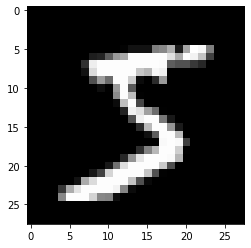

In [240]:
# plt.imshow(train_data_tensor[0].reshape(28,28), cmap="gray")
# plt.imshow(attacked_image.reshape(28, 28), cmap="gray")

In [241]:
attacked_images, attacked_outputs, attack_labels = [], [], []

In [260]:
for i, img in enumerate(train_data_tensor):
    attacked_img, attacked_output, attack_label = attack_image(img, train_data_labels[i], original_model)
    attacked_images.append(attacked_img)
    attacked_outputs.append(attacked_output)
    attack_labels.append(attack_label)
    print(i)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:
# hyperparameters - model 3
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.0001
model = DenseNet(input_size, hidden_size, num_classes)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#train the model to convergence
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #send to device
        images = images.reshape(-1, 28**2).to(device)
        labels = original_model.forward(images).to(device)
        #run model and calculate loss
        outputs = model.forward(images)
        loss = loss_function(outputs, labels)
        
        
        #calculate gradients and step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not (i+1) % 100:
            print('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    print("EPOCH {} COMPLETE".format(epoch+1))
    
test_model(model)

In [ ]:
# second experiment: for each sample in the training set, augment it so that the network has extremely high confidence

# basically just see if this works, kinda for fun

In [ ]:
# third experiment: starting with samples of noise, make k examples of high confidence training data and
# plot the curve between k and test set performance